In [2]:
import numpy as np
import pandas as pd
from IPython.display import Image, display, HTML

# Data preprocessing

In [3]:
data=pd.read_csv('prod_.csv')
data.head()


,product,year,expiri duretion in years,month,no. of new products bought,no of products left for selling,no. of products sold,prodects left,no of products to be bought,demand %
0,colgate,2019,2.0,1,60,60,46,0,46.0,76.666667
1,colgate,2019,2.0,2,32,46,38,14,24.0,118.750000
2,colgate,2019,2.0,3,40,62,47,22,25.0,117.500000
3,colgate,2019,2.0,4,36,51,40,15,25.0,111.111111
4,colgate,2019,2.0,5,56,67,58,11,47.0,103.571429


**Encoding strings into numbers**

In [4]:
unique_ele=data['product'].unique()
unique_ele_dict={}
for i in range(1,len(unique_ele)+1):
    unique_ele_dict[unique_ele[i-1]]=i

data['encoded_product']=data['product'].map(unique_ele_dict)

**Dividing data into Independent(x) and dependent(y) variables**

In [5]:
x = data.iloc[:,[10,1,3]].values
y = data.iloc[:, [6]].values

**Train Test split**

In [6]:
X_train , X_test = x[:int(len(x)*0.8)], x[int(len(x)*0.8):]
y_train , y_test = y[:int(len(y)*0.8)], y[int(len(y)*0.8):]

# **Deep Learning** 

![NN](images/nn1.png)
Looking at the network, we are now considering 2 hidden layers. The first one has 5 nodes, and the second hidden layer has 3 nodes. We have 3 input features and 1 output as it is a regression problem statement.

we know $$Y=WX+C$$
# **Forward pass**
In a deep neural network, every hidden layer has its output—the outputs act as the inputs of the next layer. So here we have an input of size  X[1×3] and the weight matrix will be of shape W1[3×5] so matrix multiplication will be of size [1×5] where it is added to bias concerning every node b1[1×5] resulting in an output of shape z1[1×5] this out then goes through a activation function as forms h1. which will acts as the input to the second hidden layer. so h1 is then multiplied to weights w2[5×3] then added to bias with respect to nodes b2[1×3] the resultant z2[1×3] then z2 will be converted to h2 by passing through a activation function of out choice. h2 then acts as input to output layer. the weight matrix w3[3×1] multiplied with h2 and added with bias b3[1×1] will result the output to be of z3[1×1] then it is passed through Linear activation to have the final output Y.

step 1 : $$ z_1 = (X[1×3] . w_1[3×5]) + b_1[1×5] $$ 
step 2 : $$ h_1 = Activation(z_1) $$
step 3 : $$ z_2 = (h_1[1×5] .w_2[5*3]) + b_2[1*3] $$
step 4 : $$ h_2 = Activation(z_2) $$
step 5 : $$ z_3 = (h_2[1\times3] \cdot w_3[3\times1]) + b[1\times1] $$
step 6 : $$ Y   = z_3 $$

Initially assigning random weights then updating through the back propagation will result in the increase in accuracy.


In [7]:
#Sample Forward pass
def forward_pass(X,w1,w2,w3,b1,b2,b3):
    z1=np.dot(X,w1)+b1
    h1=activation(z1)
    z2=np.dot(h1,w2)+b2
    h2=activation(z2)
    z3=np.dot(h2,w3)+b3
    Y=z3
    return Y,h1,h2,z1,z2,z3

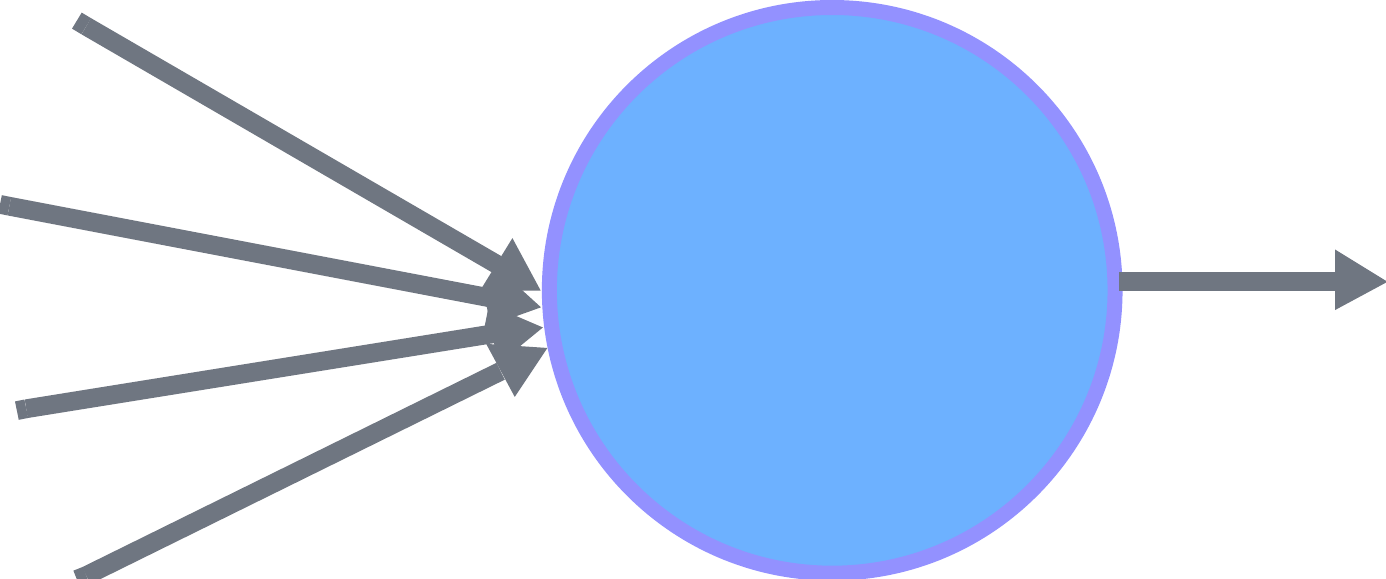

Node


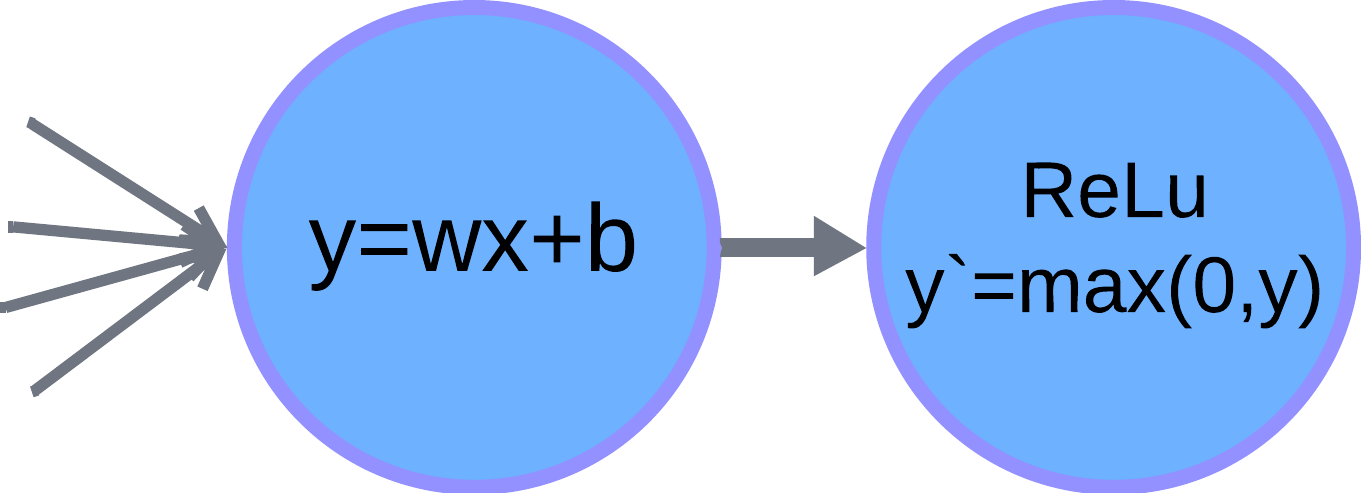

Node has two functionalities one to perform matrix multiplication and other to pass it through the activation function


In [8]:
display(Image(filename='images/nn2.png', width=300))
print('Node')
display(Image(filename='images/nn3.png', width=300))
print('Node has two functionalities one to perform matrix multiplication and other to pass it through the activation function')


# **Activation Function**

in our case we are concidering relu activation function
the reason behind relu is that looking at the problem statement we are not going to have any negative values in the output.

RELU basically projects negative values to zero and and acts linear through the positive values.
 BY using 
 $$ H = max( 0 , Z ) $$

 ReLu is used in the hidden layer and linear activation function in the output layer
 $$ Y = Z3 $$

In [9]:
def activation(x):
    return np.maximum(0, x)

# **LOSS**
so we are now calculated the output by using matrix multiplication and activation function. that output may not be our required output. this can be determined by the loss function.

loss function measures the amount of in deviation of predicted otput to the actual output.

By using Loss function we can determine the amount of improvement that needs to be made. 

there are different ways to determine the loss **Mean square error, Mean absolute error, Huber loss** for regression tasks. each has its own advantages nad disadvantages. so we are now using MSE( mean square error) for our problem statement.

$$ MSE = \frac{1}{N} \sum (Y - \hat{y})^2 $$

In [10]:
def Loss(Y,y_train,N):
    return np.sum((y_train-Y)**2)/N

# **Back propagation**

Now we are done with finding the output and using the random weights. But using random weights does'nt result in accurate output and we have a high loss. rights weights results in right outputs for that we need to adjust the weights.

this is where the back propagation comes into picture. we basically find the loss and we check for the effect of each weight on the loss. we try to nullify that effect by updating the weights. the effect of each weight can be found by calculating the gradient of loss with respect to that perticular weight. 

what does a gradient actually means. gradient represents the slope of that perticular point. What is the ,meaning opf calculating slope. slope basically gives you the amount of tilt with respect to the horizontal axis. $$ Gradient = dl/dw (slope)$$

when we are trying to plot a 2D plot between L(loss) - y axis and W(weight) - x axis . dl/dw gives you amount of deviated you are from being a horizontal line. a Horizontal line is a zero sloped line.   zero slope always occers at the minimum y with resect to x. in our case minimum loss.

$$ W_{\text{new}}= W_{\text{old}} - \alpha \times \frac{\partial L}{\partial W}$$

Looking at the equation it is clear that making dl/dw zero stope updating weights. the reason behan it is that that is the point where we have minimum loss. the x coordinate at which we have the slop zero are the perfect weights. 

 **Gradient decent**

Gradin decent is the technique where we repeatedly update the weights until there is no change or minimum change in weights. that basically means until zero slope.

![gradient decent](images/gred.png)



\begin{aligned}
\text{\{} \\
    w_n &= w_o - \alpha \cdot \frac{\partial L}{\partial w_o}, \\
    b_n &= b_o - \alpha \cdot \frac{\partial L}{\partial b_o}, \\
    &\text{if } w_o - w_n = 0: \\
    &\quad \text{break}, \\
    w_o &= w_n, \\
    b_o &= b_n \\
\text{\}}
\end{aligned}

Initially looking at the image. the black dot has high loss due to the random weights but by performing the below operation repeatedly. the decent in loss occurs. the point where gradient became zero is called the perfect weights. this weights are used when we are applying the feed forward techniques to find out the predictions for new inputs.

there are number of techniques for gradient decent. for faster and smoother global minima. those are **Batch Gradient decent, sarcastic gradient decent, Mini batch gradient decent, Momentum Gradient decent, AdaGrad, AdaDelta and Adams.** lets plot each one opf them while training.

**Gradient Decent**

we just looked at the single weight W. but practically we have number of weights (w1,w2,w3..) each weight needs to be updated in the same way as previous technique.but the only problem is that each weight has its own effect on the loss. so here dl/dw for each weight will be different.

this is where the back propagation comes into picture. so let say we are calculating the gradient with respect to w1. for this we need to traverse for Loss to w1, this include every thing that effecting the loss.

to go deep into this lets consider the same neural network as previous.

![Neural Network](images/nn-backprop.png)

if you look at the picture we have w1,w2, w3 we have 3 weight matrix , to have a perfect output our task is to change every weight. 

**Gradient with respect to W3**

To find the loss due to the w3, we need to consider all the parameters in between loss and w3. Lets describe this in a chain format Loss is depended on the output form the activation function, activation output is depended on the node output, node output is depended on the weights(w3).

![w3 back prop](images/w3-back1.png)

Loss -> W3 == Loss -> Y -> Z3 -> W3

Loss depended on Y because 
$$ MSE (Loss) L = \frac{1}{N} \sum (Y - \hat{y})^2 -> eq1$$
Y Depended on Z3 because
$$ Y = Z3  -->(\text{Linear activation function}) -< eq2$$
Z3 depended on W3
$$ z3 = W3 \times H2 + b2 -> eq3$$

So to find the dl/dw we consider having chain rule in differentiation

$$ \frac{\partial L}{\partial W3} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial Z3} \cdot \frac{\partial Z3}{\partial W3} -> eq4$$

partial derivation of L with respect to y
$$ \frac{\partial L}{\partial Y} = \frac{2}{N} (Y - \hat{y}) -> eq5$$
partial derivation of Y with respect to Z3 
we are using linear activation function
$$ \frac{\partial Y}{\partial Z3} = 1 -> eq6$$
partial derivative of Z3 with respect to W3
$$ \frac{\partial Z3}{\partial W3} = H2 -> eq7$$

Resultant 
$$ \frac{\partial L}{\partial W3} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial Z3} \cdot \frac{\partial Z3}{\partial W3} = \frac{2}{N} (Y - \hat{y}) \times 1 \cdot H2 -> eq8$$
**Gradient with respect to W2**


![w2 back prop](images/w2-back.png)


In the simile fashion to find the gradient wrt w2. we need to check for the dependency and relations.then make a chain from loss to the weight w2. looking at the image the dipendencys are quite similer but as a hidden layer got added so.

 Loss -> W2 == Loss -> Y -> Z3 -> H2 -> Z2 -> W2

 so equations that are newly introduces with respect to the terms H2, W2, Z2 going to be.
$$ \text {Relation between H2 and W2} $$
$$ H_2 = Z_2 \quad \text{if} \quad 0 < Z_2 < \infty -> eq 9$$
$$ H_2 = 0 \quad \text{if} \quad Z_2 \leq 0 $$
$$\text{relation between Z2 and W2} ->eq10$$
$$ Z_2= W_2 \times H_1 + b_2 ->eq11$$
partial differentiation by chain rule 
$$ \frac{\partial L}{\partial W2} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial Z3} \cdot \frac{\partial Z3}{\partial H2} \cdot \frac{\partial H2}{\partial Z2} \cdot \frac{\partial Z2}{\partial W2}$$
partial derivative of Z3 with respect to H2
$$ \frac{\partial Z3}{\partial H2} = W3 \text{  from eq3}$$

partial derivative of H2 with respect to Z2
$$  \frac{\partial H2}{\partial Z2} = 1 \quad \text{if} \quad 0 < Z_2 < \infty$$
$$  \frac{\partial H2}{\partial Z2} = 0 \quad \text{if} \quad Z_2 \leq 0 ->eq12$$

partial derivative of Z2 with respect to W2
$$ \frac{\partial Z2}{\partial W2} = H1 ->eq13$$

Resultant
$$ \frac{\partial L}{\partial W2} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial Z3} \cdot \frac{\partial Z3}{\partial H2} \cdot \frac{\partial H2}{\partial Z2} \cdot \frac{\partial Z2}{\partial W2} = \frac{2}{N} (Y - \hat{y}) \times 1 \cdot W3 \cdot (Z_2>0?1:0) \cdot H1$$

**Back propagating to W1**

![w1 back prop](images/w1-back.png)

By addition of Every hidden layer it back propagate by 2 units so that is through Activation and the layer weights weight multiplication with input. so for the back propagation equations will be modified accordingly.

the only terms that are added to previous chain is H1,W1,Z1, the chain look like

 Loss -> W3 == Loss -> Y -> Z3 -> H2 -> Z2 -> H1 -> Z1 -> W1

$$ \text {Relation between H1 and Z1} $$
$$ H_1 = Z_1 \quad \text{if} \quad 0 < Z_2 < \infty $$
$$ H_1 = 0 \quad \text{if} \quad Z_2 \leq 0 $$
$$\text{relation between Z1 and W1}$$
$$ Z_1= W_1 \times X + b_1 ->eq15$$

partial differentiation by chain rule 
$$ \frac{\partial L}{\partial W1} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial Z3} \cdot \frac{\partial Z3}{\partial H2} \cdot \frac{\partial H2}{\partial Z2} \cdot \frac{\partial Z2}{\partial H1} \cdot \frac{\partial H1}{\partial Z1} \cdot \frac{\partial Z1}{\partial W1}$$

from eq 11 the partial differentiation of Z2 with respect to H1
$$ \frac{\partial Z2}{\partial H1} = W2$$

partial derivative of H1 with respect to Z1
$$  \frac{\partial H1}{\partial Z1} = 1 \quad \text{if} \quad 0 < Z_1 < \infty$$
$$  \frac{\partial H1}{\partial Z1} = 0 \quad \text{if} \quad Z_1 \leq 0 $$

partial derivative of Z1 with respect to W1
$$ \frac{\partial Z1}{\partial W1} = X$$

Resultant equation of Gradient of loss with respect to W1
$$ \frac{\partial L}{\partial W1} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial Z3} \cdot \frac{\partial Z3}{\partial H2} \cdot \frac{\partial H2}{\partial Z2} \cdot \frac{\partial Z2}{\partial H1} \cdot \frac{\partial H1}{\partial Z1} \cdot \frac{\partial Z1}{\partial W1} = \frac{2}{N} (Y - \hat{y}) \times 1 \cdot W3 \cdot (Z_2>0?1:0) \cdot W2 \cdot (Z_1>0?1:0) \cdot X$$



Now we have the equations of dl/dw1 , dl/dw2 , dl/dw3 now we just need to back propagate and update the weights, doing it multiple times improve the accuracy of the model. each time we update the weights we could observe that our Loss must be decreasing.

**Learning Rate**


Learning rate restrict the larger jumps while updating the weights, the dis advantage for larger jumps will be that there is higher possibility that we are going to miss the global minima as we take larger steps. the alpha(Learning rate ) value is generally considered as much less for higher probability of reaching global minima( Slope =0 ) for Loss.

Alpha value can also be controlled by using various optimization techniques. where we consider Alpha larger when we are far away from the global minima (when we have more loss) have make it significantly lesser when we are near to the global minima (less slope) we can see this techniques in some of optimization techniques like **AdaGrad, AdaDelta, Adams**

For now Lets consider Alpha value as smaller 0.01

**weight updating**

so as per the formula

$$ W_{\text{new}}= W_{\text{old}} - \alpha \times \frac{\partial L}{\partial W}$$

Now we have multiple weights W1,W2,W3 for each weight we also have gradient with Loss with respect to respective weights.

so 
$$ \frac{\partial L}{\partial W1} = \frac{2}{N} (Y - \hat{y}) \times 1 \cdot W3 \cdot (Z_2>0?1:0) \cdot W2 \cdot (Z_1>0?1:0) \cdot X$$
$$ \frac{\partial L}{\partial W2} = \frac{2}{N} (Y - \hat{y}) \times 1 \cdot W3 \cdot (Z_2>0?1:0) \cdot H1$$
$$ \frac{\partial L}{\partial W3} = \frac{2}{N} (Y - \hat{y}) \times 1 \cdot H2$$

now updating the weights 

$$ W3= W3- 0.01 \times \frac{2}{N} (Y - \hat{y}) \times 1 \cdot H2$$
$$ W2= W2- 0.01 \times \frac{2}{N} (Y - \hat{y}) \times 1 \cdot W3 \cdot (Z_2>0?1:0) \cdot H1$$
$$ W1= W1- 0.01 \times \frac{2}{N} (Y - \hat{y}) \times 1 \cdot W3 \cdot (Z_2>0?1:0) \cdot W2 \cdot (Z_1>0?1:0) \cdot X$$

For updating bias, if you care fully observe the equation $$ Y =W \cdot X + b $$
 the only difference occurs when we calculate dy/db in the case of weights dZ1/dw1 , dZ2/dW2 the last differential of the chain.
so in the case of bias while calculating dz1/db1 dz2/db2 .... we get the result as 1. so 
Bias update 

$$ b3= b3- 0.01 \times \frac{2}{N} (Y - \hat{y}) \times 1$$
$$ b2= b2- 0.01 \times \frac{2}{N} (Y - \hat{y}) \times 1 \cdot W3 \cdot (Z_2>0?1:0)$$
$$ b1= b1- 0.01 \times \frac{2}{N} (Y - \hat{y}) \times 1 \cdot W3 \cdot (Z_2>0?1:0) \cdot W2 \cdot (Z_1>0?1:0)$$








In [18]:
def deactivate(x):
    return np.where(x > 0, 1, 0)
#Backward pass
def back_prop(w1,w2,w3,b1,b2,b3,X,Y,y_train,N,h1,h2,z1,z2):
    w3=w3-0.01*np.dot(h2.T,(2/N)*(y_train-Y))
    w2=w2-0.01*np.dot(h1.T,(2/N)*(y_train-Y) @ w3.T*deactivate(z2))
    w1=w1-0.01*np.dot(X_train.T,(2/N)*(y_train-Y) @ w3.T*deactivate(z2) @ w2.T*deactivate(z1))
    b3=b3-0.01*np.sum((2/N)*((y_train-Y)))
    b2=b2-0.01*np.sum((2/N)*((y_train-Y)) @ w3.T*deactivate(z2))
    b1=b1-0.01*np.sum((2/N)*((y_train-Y)) @ w3.T*deactivate(z2) @ w2.T*deactivate(z1))
    return w1,w2,w3,b1,b2,b3


In [12]:
input_nodes=3
hidden_1_nodes=5
hidden_2_nodes=3
output_nodes=1
N=len(y_train)

In [13]:
def model(input_nodes,hidden_1_nodes,hidden_2_nodes,output_nodes): 
    #weights
    w1=np.random.randn(input_nodes,hidden_1_nodes)
    w2=np.random.randn(hidden_1_nodes,hidden_2_nodes)
    w3=np.random.randn(hidden_2_nodes,output_nodes)

    #biases
    b1=np.random.randn(hidden_1_nodes)
    b2=np.random.randn(hidden_2_nodes)
    b3=np.random.randn(output_nodes)

    return w1,w2,w3,b1,b2,b3

In [16]:
def train(e,X_train,y_train):
    w1,w2,w3,b1,b2,b3=model(input_nodes=3,hidden_1_nodes=5,hidden_2_nodes=3,output_nodes=1)
    Y,h1,h2,z1,z2,z3=forward_pass(X_train,w1,w2,w3,b1,b2,b3)
    loss_old=Loss(Y,y_train,N)
    for i in range(e):
        print("loss")
        w1,w2,w3,b1,b2,b3=back_prop(w1,w2,w3,b1,b2,b3,X_train,Y,y_train,N,h1,h2,z1,z2)
        Y,h1,h2,z1,z2,z3=forward_pass(X_train,w1,w2,w3,b1,b2,b3)
        loss_new=Loss(Y,y_train,N)
        print(loss_new)
        # if(loss_old-loss_new<0.0001):
        #     break
        loss_old=loss_new
    return w1,w2,w3,b1,b2,b3,loss_new

In [17]:
train(1000,X_train,y_train)

loss
25301.227703780845
loss
24785.772931472522
loss
24290.730168147616
loss
23815.291098250374
loss
23358.67941552106
loss
22920.149555427823
loss
22498.98547779428
loss
22094.49949763502
loss
21706.031162290077
loss
21332.94617302479
loss
20974.63534933441
loss
20630.51363426217
loss
20300.01913910678
loss
19982.61222595955
loss
19677.774626572955
loss
19385.00859612206
loss
19103.836100477027
loss
18833.798035659536
loss
18574.45347820882
loss
18325.378965233147
loss
18086.16780297132
loss
17856.42940273505
loss
17635.78864314815
loss
17423.88525764087
loss
17220.373246199695
loss
17024.920310411588
loss
16837.207310880684
loss
16656.927746131212
loss
16483.787252145816
loss
16317.50312172224
loss
16157.803842863443
loss
16004.42865544745
loss
15857.127125453131
loss
15715.65873604658
loss
15579.792494860538
loss
15449.306556825464
loss
15323.987861936574
loss
15203.631787365284
loss
15088.041813347021
loss
14977.029202299875
loss
14870.412690650195
loss
14768.018192861848
loss
1466

(array([[ 0.48614494,  0.26392429, -0.13728772, -1.06165683,  1.4820095 ],
        [-0.2697351 ,  0.55111086,  0.37041488, -1.02429746,  0.63103717],
        [-0.23521466,  0.79605629,  0.93576422, -0.11059315,  0.27657598]]),
 array([[ 0.17581618,  0.93673168,  0.35513995],
        [ 0.80477284, -0.8134187 , -1.61927598],
        [-0.84901294, -0.59464712,  0.94617427],
        [-0.29983934, -0.82806292,  1.141186  ],
        [-0.33384061, -1.64815143,  0.40142356]]),
 array([[-1.51553874],
        [ 0.01520006],
        [-1.9130047 ]]),
 array([-0.76981786, -1.61694527, -0.03803973,  0.93580788,  0.6531649 ]),
 array([-1.49022511e+00, -2.35030359e+00,  6.92581586e-04]),
 array([116.0726255]),
 12284.693049530291)

$$ W3= W3- 0.01 \times \frac{2}{N} (Y - \hat{y}) \times 1 \cdot H2$$
$$ W2= W2- 0.01 \times \frac{2}{N} (Y - \hat{y}) \times 1 \cdot W3 \cdot (Z_2>0?1:0) \cdot H1$$
$$ W1= W1- 0.01 \times \frac{2}{N} (Y - \hat{y}) \times 1 \cdot W3 \cdot (Z_2>0?1:0) \cdot W2 \cdot (Z_1>0?1:0) \cdot X$$